In [20]:
def graficorecuperaciones(equipo):

    import pandas as pd
    #definimos el equipo
    #leemos el archivo con todos los partidos
    dfpartidos=pd.read_json('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/37/42.json')
    #separamos la columna home_team
    sep=dfpartidos['home_team'].apply(pd.Series)
    sep1=list(sep)
    dfpartidos[sep1]=pd.DataFrame(dfpartidos.home_team.values.tolist(),index=dfpartidos.index)
    #separamos la columna away_team
    sep=dfpartidos['away_team'].apply(pd.Series)
    sep1=list(sep)
    dfpartidos[sep1]=pd.DataFrame(dfpartidos.away_team.values.tolist(),index=dfpartidos.index)
    #nos quedamos con los partidos en los que participa el equipo
    dfsoloequipo=dfpartidos.loc[(dfpartidos['home_team_name']==equipo) | (dfpartidos['away_team_name']==equipo)]
    listapartidos=dfsoloequipo['match_id'].tolist()
    #montamos el dataframe con todos los eventos
    filenames=[]
    for i in listapartidos:
        filenames.append(pd.read_json('https://raw.githubusercontent.com/gonzalo09002/open-data/81bb27062e43874a1bdb72be9d243e93a8212dbc/data/events/'+str(i)+'.json'))
        dfeventos = pd.concat(filenames, ignore_index=True,sort=True)    
    
    #nos quedamos con los eventos de recuperaciones de balón en juego corrido
    dfrec=dfeventos.loc[(dfeventos['type']=={'id': 2, 'name': 'Ball Recovery'}) & (dfeventos['play_pattern']=={'id': 1, 'name': 'Regular Play'}) & (dfeventos['position'] != {'id': 1, 'name': 'Goalkeeper'})].dropna(axis=1)
    #separamos la columna team
    sep=dfrec['team'].apply(pd.Series)
    sep1=list(sep)
    dfrec[sep1]=pd.DataFrame(dfrec.team.values.tolist(),index=dfrec.index)
    #nos quedamos con las recuperaciones propias
    dfrec=dfrec[(dfrec['name']==equipo)]
    #separamos la columna location
    sep=dfrec['location'].apply(pd.Series)
    sep1=list(sep)
    dfrec[sep1]=pd.DataFrame(dfrec.location.values.tolist(),index=dfrec.index)

    dfrec.rename(columns={0: 'x', 1: 'y'},inplace=True)
    
    dfrec['y']=80-(dfrec['y'])


    import matplotlib.pyplot as plt
    from matplotlib.patches import Arc
    import numpy as np

    fig, ax = plt.subplots(figsize=(18,14))

    #Dibujamos el campo siguiendo coordenadas de StatsBomb
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black") 
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[80,0], color="black")

    plt.plot([0,18],[62,62],color="black")
    plt.plot([0,18],[18,18],color="black")
    plt.plot([18,18],[18,62],color="black")

    plt.plot([120,102],[62,62],color="black")
    plt.plot([120,102],[18,18],color="black")
    plt.plot([102,102],[18,62],color="black")

    plt.plot([0,6],[50,50],color="black")
    plt.plot([0,6],[30,30],color="black")
    plt.plot([6,6],[50,30],color="black")
 
    plt.plot([120,114],[30,30],color="black")
    plt.plot([120,114],[50,50],color="black")
    plt.plot([114,114],[30,50],color="black")

    centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.6,color="black")
    leftPenSpot = plt.Circle((12,40),0.6,color="black")
    rightPenSpot = plt.Circle((108,40),0.6,color="black")

    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    ax.add_patch(leftArc)
    ax.add_patch(rightArc)


    ax.scatter(x=dfrec['x'],y=dfrec['y'],s=200,marker='2',c='#C0AC05')
    ax.axis("off")

    ax_histx=fig.add_axes([0.125,0.9,0.765,0.1],label='nuevos')
    ax_histx.xaxis.set_visible(False) 
    ax_histx.set_frame_on(False)



    ax_histy = fig.add_axes([0.9,0.125,0.1,0.75],label='nuevosy')
    ax_histy.yaxis.set_visible(False)
    ax_histy.set_frame_on(False)


    binsx = np.arange(0, 120, 0.8)
    binsy= np.arange(0,80,0.8)
    ax_histx.hist(dfrec['x'],bins=binsx, color='#C0AC05' )

    ax_histy.hist(dfrec['y'], bins=binsy,orientation='horizontal',color='#C0AC05')


    ax.text(60, 100, s ="Mapa de recuperaciones {}".format(equipo), size = 35, color='black', ha='center', family='bahnschrift')


    plt.show()

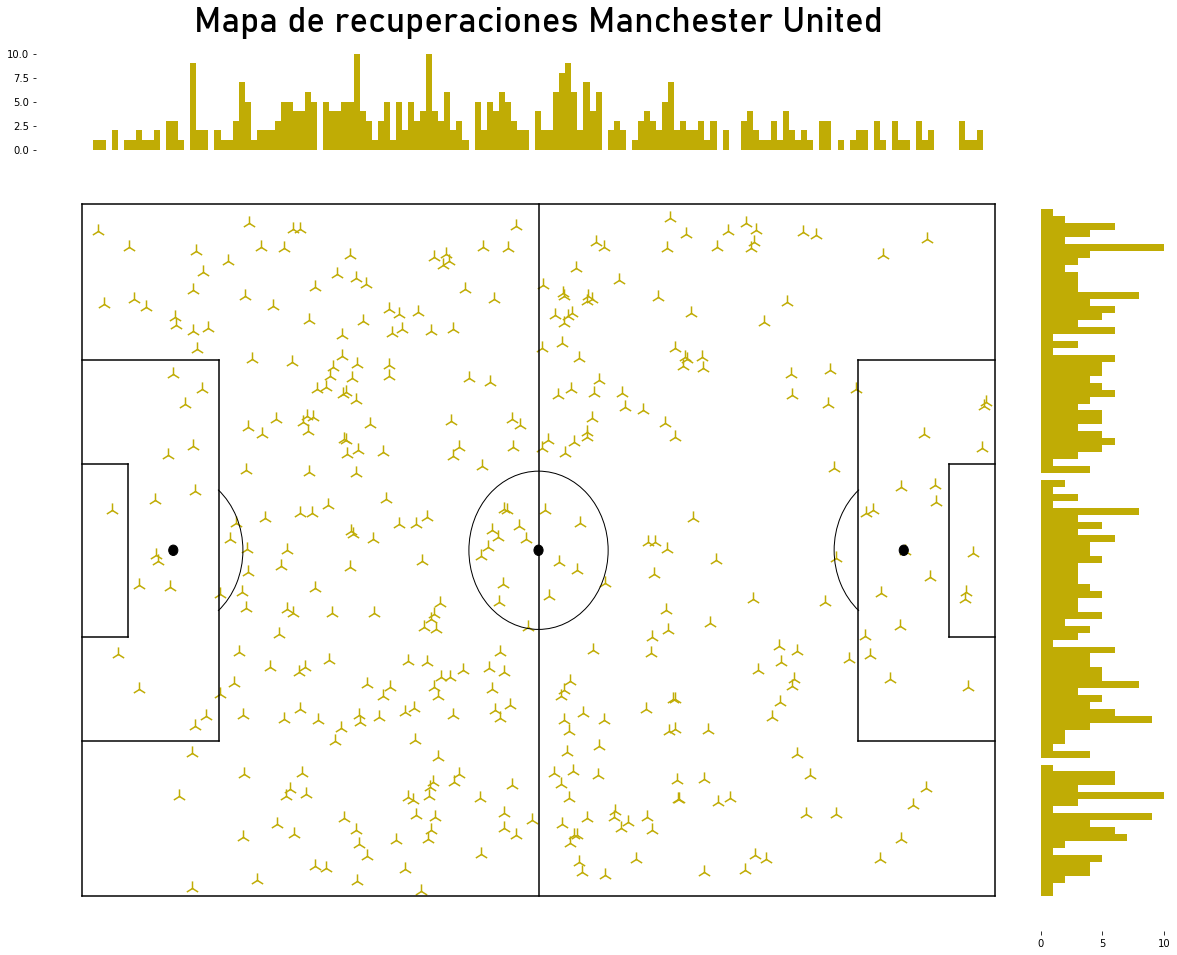

In [21]:
graficorecuperaciones("Manchester United")